In [4]:
BASE = "/home/howard/QIL_final/VQE/scripts/adapt_vqes/results/logs/"
PATH = BASE+"25-Dec-2023 (17:28:12.579374).txt"
CSV_BASE="/home/howard/QIL_final/VQE/results/iter_vqe_results/"
CSV_PATH = CSV_BASE+"BeH2_adapt_q_exc_{'occupied': [], 'unoccupied': []}_25-Dec-2023 (21:41:17.533591).csv"

In [23]:
import re

file_path = PATH # Replace with the actual path to your log file

energy_values = []

with open(file_path, 'r') as file:
    for line in file:
        match = re.search(r'INFO \d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3} Add new element to final ansatz .* Energy ([-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?)', line)
        if match:
            energy_values.append(match.group(1))

print(energy_values)
print(len(energy_values))

['-15.576193109647852', '-15.58056532328096', '-15.585071164506179', '-15.588004632880441', '-15.590461037966193', '-15.593091855776075', '-15.5946784009353', '-15.594713910721449', '-15.594758442934813', '-15.594802499715872', '-15.594845714813319', '-15.59488847083552', '-15.594940848868989', '-15.594997154748109', '-15.595006610434874', '-15.595015978277951', '-15.595037073669223', '-15.59505762993803', '-15.595060637801094', '-15.59506360799579', '-15.595064972702101', '-15.595066160776726', '-15.595067293323844', '-15.595068300538337', '-15.595069110882843', '-15.595069734255507', '-15.595072380020886', '-15.595074976251466', '-15.595086093267735', '-15.595123562750006', '-15.595145484611013', '-15.595155530255743', '-15.59519159938102', '-15.595210228993022', '-15.59522467369458', '-15.595234937101072', '-15.59523625314031', '-15.595236825891273', '-15.595237319408769', '-15.595237337177297', '-15.595237926393109', '-15.595238348443994', '-15.595238354425431', '-15.59523871953207

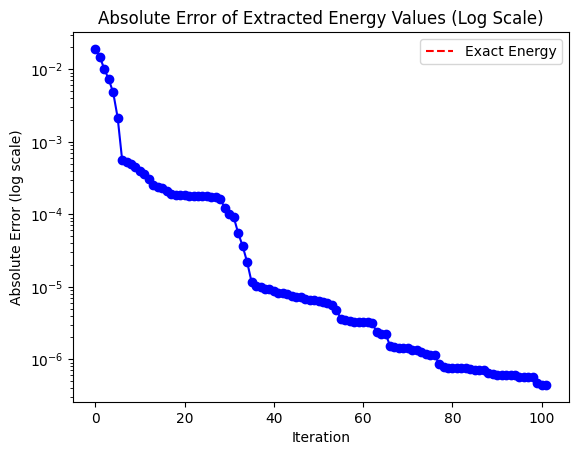

In [26]:
import re
import matplotlib.pyplot as plt

file_path = PATH  # Replace with the actual path to your log file
exact_energy = -15.595246585720805

energy_values = []

with open(file_path, 'r') as file:
    for line in file:
        match = re.search(r'INFO \d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3} Add new element to final ansatz .* Energy ([-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?)', line)
        if match:
            energy_values.append(float(match.group(1)))

# Calculate the absolute error
abs_error_values = [abs(exact_energy - energy) for energy in energy_values]

# Plot the absolute error values with log scale on the y-axis
plt.semilogy(abs_error_values, marker='o', linestyle='-', color='b')
plt.axhline(0, color='r', linestyle='--', label='Exact Energy')

plt.title('Absolute Error of Extracted Energy Values (Log Scale)')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error (log scale)')
plt.legend()
plt.show()


In [10]:
import csv

csv_file_path = CSV_PATH  # Replace with the actual path to your CSV file

energy_values = []
error_values = []

with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        energy_values.append(float(row['E']))
        error_values.append(float(row['error']))

print(energy_values)
print(len(energy_values))


[-15.566756541415858, -15.570935203473734, -15.57521618204935, -15.578093027055393, -15.582317535773281, -15.584867337223756, -15.58765323486733, -15.589389210918686, -15.591896270201492, -15.59426136535958, -15.594303340082416, -15.594339012528215, -15.59435949416103, -15.594379775284922, -15.594423864252372, -15.59446748406248, -15.594509965976293, -15.594551999146928, -15.59460027630725, -15.594652145295369, -15.594661132403806, -15.594670042042486, -15.594747104737301, -15.59482291363018, -15.594825888831721, -15.59482883713924, -15.594842545004198, -15.594856149991838, -15.594857523734817, -15.594858712985605, -15.594859860151224, -15.59486087525313, -15.594861671168852, -15.594862283641492, -15.59486581162895, -15.594869138398947, -15.594928055994181, -15.594985863554363, -15.595034127170548, -15.595086584335215, -15.595090982716028, -15.595095324873785, -15.595113350135701, -15.5951650153192, -15.595212302582759, -15.59521335226308, -15.595215657047076, -15.595216334758113, -15.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


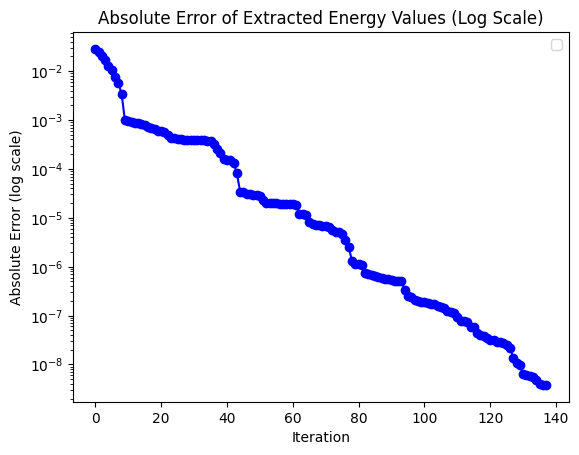

In [12]:
import matplotlib.pyplot as plt
plt.semilogy(error_values, marker='o', linestyle='-', color='b')

plt.title('Absolute Error of Extracted Energy Values (Log Scale)')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error (log scale)')
plt.legend()
plt.show()